# Find the Flag
![Flags](flags.png)

Flags have always been a source of fascination for me. Ever since I was in kindergarted and decided to recreate over 100 world and state flags with crayon on computer paper. My drawing was never very good (I put off Bhutan for as long as I could), but I loved the mostly geometric shapes with colors alluding to some national ideals. So I was very excited when [Codecademy](https://www.codecademy.com/learn) presented a flag-related machine learning project!

In this project, we are provided with `flags.csv` which contians information on countries and their flags such as which colors and shapes they contain. Our objective is to build a decision tree to determine the continent from which a flag comes given its attributes. 

Let's start by taking a look at our data:

In [108]:
import pandas as pd

flags = pd.read_csv('flags.csv')
flags

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [109]:
for col in flags.columns:
    print(col)

Name
Landmass
Zone
Area
Population
Language
Religion
Bars
Stripes
Colors
Red
Green
Blue
Gold
White
Black
Orange
Mainhue
Circles
Crosses
Saltires
Quarters
Sunstars
Crescent
Triangle
Icon
Animate
Text
Topleft
Botright


We see that we are provided a dataset of 194 nations with national attributes such as `Landmass`, `Area`, and `Population` and attributes of their flag such as how many `Colors` and `Stripes` it contains, whether one of those colors is `Blue`, `Black`, etc. and if it includes features such as a `Crescent` or a `Triangle`. 

To understand what the data represents in some of these columns (what does a `Language` of "10" mean, for instance) we will need to consult the documentation for this dataset from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Flags):

Attribute Information:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

Using this key, we can understand that Afghanistan, for example, is in Asia, is 648 sq km, has approximately 16 million people and is predominatly Muslim.

Since the objective of this project is to predict the continent on which a country resides, we will convert the `Landmass` column of the dataset to our `labels`.

In [110]:
labels = flags[["Landmass"]]

Now we will choose which columns will serve as our features used to predict the label. Let's first try using only the colors of the flag.

In [111]:
features = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]

Now that we have our features and labels, we need to split our dataset into training and testing sets.

In [112]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

Now it's time to create our classification model! We will be using a decision tree to do this.

In [113]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 1)
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

Now to see how well this model performs on our set-aside test data.

In [114]:
score = tree.score(test_data, test_labels)
print(f"The accuracy of the model is: {score:.2%}")

The accuracy of the model is: 37.29%


With 6 possible landmasses, a random guess would yield an accuracy of 1/6, or 16.67%. So clearly this model beats a random guess, but it isn't great. Two ways we could try to improve our model are to add features or tune the model. Before adding more features, let's see if we can be a bit more accurate with the colors alone.

With a decision tree, we can tune our model by adjusting the maximum depth parameter. This limits the number of times the tree can branch, thereby reducing its ability to over-fit on the training data. We will try a range of `max_depth` values and plot the accuracy for each to help us decide on an optimal parameter value.

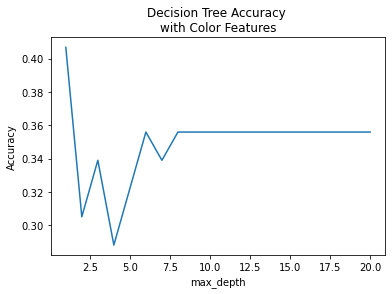

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
depth = []
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state = 42, max_depth = i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)
    depth.append(i)

ax = sns.lineplot(x=depth, y=scores)
ax.set(title="Decision Tree Accuracy \nwith Color Features", ylabel="Accuracy", xlabel="max_depth")
plt.show()


Seeing as the max_depth doesn't really seem to have a large impact on accuracy, this may be an indication that our model would improve with more features. 

Let's now add all of the features in the dataset that have to do with the nation's flag. Then we can repeat the above process to see how our model now performs.

You will notice that some of the flag-related features are not number. For example, `"Mainhue"`, which is the predominant color in the flag is a string, "green" or "blue", for example. Similarly with `"Topleft"` and `"Botright"`.

These categorical columns don't work well in a decision tree context. The decision tree branches based on whether a value is greater are lesser than some threshold. For example, take the left branch if the third index is less than 5.0, and the right branch otherwise. This clearly won't handle colors colors well. Is green less than or greater than yellow?

To accomadate this categorical data we can convert it into a "one-hot" encoding scheme. Let's say we have 4 unique values for the columns: blue, red, green, and yellow. We can break this up into 4 separate columns with the first containing a 1 if it is blue, and zero otherwise. The second column will have a 1 if it is red, zero otherwise, and so on.

We can first look at how many unique values are in each of our columns of interest, and what they are.

In [116]:
mainhue_values = flags["Mainhue"].unique()
topleft_values = flags["Topleft"].unique()
botright_values = flags["Botright"].unique()

num_mainhue_values = len(mainhue_values)
num_topleft_values = len(topleft_values)
num_botright_values = len(botright_values)

print(f"The 'Mainhue' column has {num_mainhue_values} unique values. They are: \n{mainhue_values}\n")
print(f"The 'Topleft' column has {num_topleft_values} unique values. They are: \n{topleft_values}\n")
print(f"The 'Botright' column has {num_botright_values} unique values. They are: \n{botright_values}")



The 'Mainhue' column has 8 unique values. They are: 
['green' 'red' 'blue' 'gold' 'white' 'orange' 'black' 'brown']

The 'Topleft' column has 7 unique values. They are: 
['black' 'red' 'green' 'blue' 'white' 'orange' 'gold']

The 'Botright' column has 8 unique values. They are: 
['green' 'red' 'white' 'black' 'blue' 'gold' 'orange' 'brown']


To convert these columns to one-hot encoding, we can use the `get_dummies()` pandas function.

In [117]:
mainhue = pd.get_dummies(flags["Mainhue"], prefix="Mainhue")
mainhue

,Mainhue_black,Mainhue_blue,Mainhue_brown,Mainhue_gold,Mainhue_green,Mainhue_orange,Mainhue_red,Mainhue_white
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
189,0,0,0,0,0,0,1,0
190,0,0,0,0,0,0,1,0
191,0,0,0,0,1,0,0,0
192,0,0,0,0,1,0,0,0


We can see how each row only has a single `1` in it (hence, the "one-hot" name). We will do the same thing for `Topleft` and `Botright` and then concatenate them with a newly assigned `features` variable which includes all of the already-numeric flag-realated columns.

In [118]:
topleft = pd.get_dummies(flags["Topleft"], prefix="Topleft")
botright = pd.get_dummies(flags["Botright"], prefix="Botright")
features = flags[["Bars", "Stripes", "Colors", "Red", "Green", "Blue", "Gold", "White", "Black", "Orange", "Circles", "Crosses", "Saltires", "Quarters", "Sunstars", "Crescent", "Triangle", "Icon", "Animate", "Text"]]
features = pd.concat([features, topleft, botright], axis=1)


Now we can go through the same process as before of splitting the features and labels into training and testing sets, create a model, train it, and visualize its accuracy on the test set as we adjust parameters.

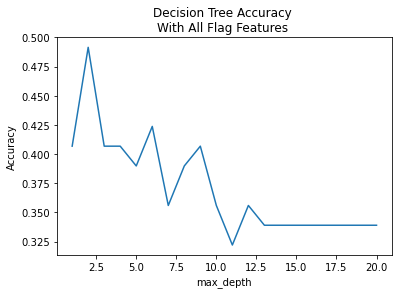

In [122]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

scores = []
depth = []
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state = 42, max_depth = i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)
    depth.append(i)

ax = sns.lineplot(x=depth, y=scores)
ax.set(title="Decision Tree Accuracy \nWith All Flag Features ", ylabel="Accuracy", xlabel="max_depth")
plt.show()

Here we do see improved performance. Previously the greatest accuracy was about 40%, whereas now with the new features incorporated we see an accuracy of almost 50% with a maximum tree depth restricted to 2. Apparently knowing what shapes and predominant colors are on a flag can really help tell you about where it comes from! Furthermore, we see a rather characteristic shape in this graph. We see that for very shallow trees, the model underfits the test set resulting in relatively low accuracy. Then the model accuracy increased to a peak, after which it declines again as the model starts to overfit on the training set, and not gernalize well to the testing set.

There are other parameters we can adjust in the decision tree as well as `max_depth`. Another common parameter to adjust is `max_leaf_nodes`. I will demonstrate adjusting these parameters in tandem and using a scatterplot with a colorbar to visualize how well the model performs under different settings.

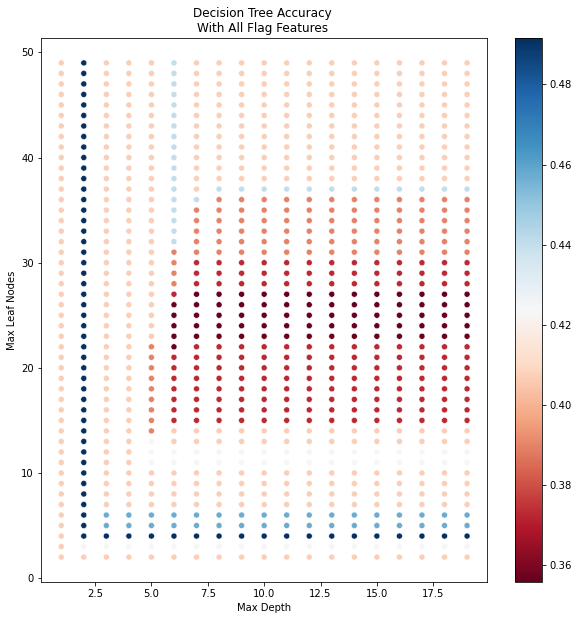

In [146]:
scores = []
depth = []
nodes = []
for i in range(2,50):
    for j in range(1,20):
        tree = DecisionTreeClassifier(random_state = 42, max_leaf_nodes = i, max_depth = j)
        tree.fit(train_data, train_labels)
        score = tree.score(test_data, test_labels)
        scores.append(score)
        nodes.append(i)
        depth.append(j)
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x=depth, y=nodes, hue=scores, palette='RdBu')
norm = plt.Normalize(min(scores), max(scores))
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)
ax.set(title="Decision Tree Accuracy \nWith All Flag Features ", ylabel="Max Leaf Nodes", xlabel="Max Depth")
plt.show()

It appears that a model with low `max_depth` or low `max_leaf_nodes` value always performs well on the test set (at about 46% to 49% accuracy).

Other parameters could be adjusted as well to further tune the model. Parameter tuning can be part art and part science as you investigate how they affect the model performance when adjusted individually, or in conjunction with others.

A point I skipped over in this is the practice of using a third split of the data with a "validataion set". As parameters are adjusted (sometimes called "hyperparameters" to distinguish them from the parameters __within__ the model) the model should be trained using only the training set, then run on the validataion set to check accuracy, while still setting the testing set aside. Only once a final set of hyperparameters has been chosen should the model be trained using **both** the training and validataion set, and then finally tested on the testing set. 
The reason for holding out the testing set until the very end is that if you are constantly checking the model against the test set, you may select a set of hyperparameters that just happens to work well for your currently designed testing set, but wouldn't generalize well to other data. The ability to generalize well to yet-unseen data is a requirement of a good machine learning model.